In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [56]:
df=pd.read_csv('carprices.csv')

In [57]:
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [58]:
df['Car Model'].unique()

array(['BMW X5', 'Audi A5', 'Mercedez Benz C class'], dtype=object)

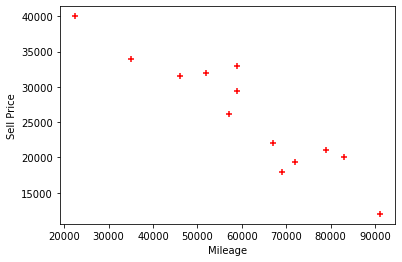

Text(0, 0.5, 'Sell Price')

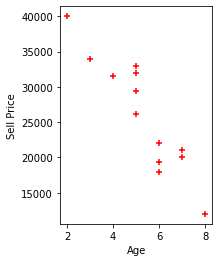

In [84]:
plt.subplot(1,1,1)
plt.scatter(df['Mileage'], df['Sell Price($)'], marker='+', color='r')
plt.xlabel('Mileage')
plt.ylabel('Sell Price')
plt.show()
plt.subplot(1,2,2)
plt.scatter(df['Age(yrs)'], df['Sell Price($)'], marker='+', color='r')
plt.xlabel('Age')
plt.ylabel('Sell Price')

In [80]:
#Dummy variables are usefill as they enable us to use a single regression eqn for multilple groups
dummies=pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [60]:
merged= pd.concat([df,dummies], axis=1)

In [61]:
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [88]:
new_df=merged.drop(['Car Model', 'Audi A5'], axis=1) # here we dropped Audi A5 to save our model from dummy variable trap
new_df

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [63]:
X=new_df.drop('Sell Price($)', axis=1)
y=new_df['Sell Price($)']

In [51]:
reg=linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [65]:
# predicting price of mercedez benz, 4 years old with mileage of 45000
reg.predict([[45000,4,0,1]])

array([36991.31721061])

In [86]:
reg.score(X,y)

0.9417050937281082

In [87]:
#small data set is the reason for the low accuracy of this model